In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the data files and store both as separate Pandas DataFrames
city_data_df = pd.read_csv(city_data_to_load)
# print(city_data_df.head())
ride_data_df = pd.read_csv(ride_data_to_load)
# print(ride_data_df.head())

# ride_data_df

In [4]:
# # INSPECT THE CITY DATA
# # 1. Get the columns and the rows that are not null
# print(city_data_df.count())

# # 2. Get the columns and the rows that are null
# print(city_data_df.isnull().sum())

# # 3. Get the data types of each column
# print(city_data_df.dtypes)

# # 4. Get the unique values of the type of city
# print(city_data_df["type"].unique())

# # 5. Get the number of data points from the Urban cities
# print(sum(city_data_df["type"]=="Urban"))
# print(sum(city_data_df["type"]=="Suburban"))
# print(sum(city_data_df["type"]=="Rural"))

In [5]:
# # INSPECT THE RIDE DATA
# # 1. Get the columns and the rows that are not null
# print(ride_data_df.count())

# # 2. Get the columns and the rows that are null
# print(ride_data_df.isnull().sum())

# # 3. Get the data types of each column
# print(ride_data_df.dtypes)

In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
# pyber_data_df

# Module 5 Challenge Psuedocode

## Deliverable 1 - A Summary DataFrame
1. Caculate total rides per city-type
2. Caculate total drivers per city-type
3. Caculate total fares per city-type
4. Caculate average fare per ride per city-type
5. Caculate average fare per driver per city-type
6. Create new DataFrame
7. Format new DataFrame

In [7]:
# 1. Total rides per city-type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
# total_rides

In [8]:
# 2. Total drivers per city-type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
# total_drivers

In [9]:
# 3. Total fares per city-type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
# total_fares

In [10]:
# 4. Average fare per ride per city-type
average_fare_ride = total_fares / total_rides
# average_fare_ride

In [11]:
# 5. Average fare per driver per city-type
average_fare_driver = total_fares / total_drivers
# average_fare_driver

In [12]:
# 6. Creation of summary DataFrame 
challenge_summary_df = pd.DataFrame ({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare_ride,
    "Average Fare per Driver": average_fare_driver
})
# challenge_summary_df

In [13]:
# 7. Format DataFrame
challenge_summary_df.index.name = None
challenge_summary_df["Total Rides"] = challenge_summary_df["Total Rides"].map("{:,.0f}".format)
challenge_summary_df["Total Drivers"] = challenge_summary_df["Total Drivers"].map("{:,.0f}".format)
challenge_summary_df["Total Fares"] = challenge_summary_df["Total Fares"].map("${:,.2f}".format)
challenge_summary_df["Average Fare per Ride"] = challenge_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
challenge_summary_df["Average Fare per Driver"] = challenge_summary_df["Average Fare per Driver"].map("${:,.2f}".format) 

In [14]:
challenge_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# Module 5 Challenge Psuedocode

## Deliverable 2 - Multi-Line Plot for the Sum of the Fares for Each City Type
1. Modify pyber_data_df by renaming columns
2. Set the index to the Date column
3. Create new DataFrame - include Fares, City Type, and index = Date
4. Set index to the datetime data type
5. Calculate the total fares by type of city and date then convert the groupby Series into a DataFrame
6. Reset the index, create pivot table DataFrame with Date as index
7. Create new DataFrame from pivot table DataFrame on the given dates
8. Create new DataFrame using resample() in weekly bins and calculate the total of the fares for each week
9. Using object-oriented interface method, plot the DataFrame
    -Import the style from Matplotlib.
    -Use the FiveThirtyEight (Links to an external site.) graph style.
    -Add a title.
    -Add x- and y-axis labels according to the final figure.
    -Save the figure to the “analysis” folder.
    -Make the figure size large enough so it’s not too small.

In [15]:
# 1. Rename columns
pyber_data_df = pyber_data_df.rename(columns={
                                        'city':'City', 
                                        'date':'Date',
                                        'fare':'Fare', 
                                        'ride_id': 'Ride Id',
                                        'driver_count': 'No. Drivers', 
                                        'type':'City Type'
                                        })
# pyber_data_df

In [16]:
# 2. Set index to Date column
pyber_data_df = pyber_data_df.set_index('Date')
# pyber_data_df

In [17]:
# 3. Create new DataFrame to include only City Type and Fare
challenge_line_graph_df = pyber_data_df.loc[:,['City Type', 'Fare']].copy()
# challenge_line_graph_df.head()

In [18]:
# 4. Set the index to the datetime type
challenge_line_graph_df.index = pd.to_datetime(challenge_line_graph_df.index)
# challenge_line_graph_df

In [19]:
# Confirm index is Datetime
# challenge_line_graph_df.info()

In [20]:
# 5 Calculate the total fares by the type of city and date to create a series then convert the groupby Series into a DataFrame
challenge_line_graph_df = pd.DataFrame(challenge_line_graph_df.groupby(["City Type", "Date"]).sum()["Fare"])
# challenge_line_graph_df

In [21]:
# 6. Reset the index, create a pivot table DataFrame with the Date as the index and columns = City Type
challenge_line_graph_df = challenge_line_graph_df.reset_index()
challenge_line_graph_df = pd.pivot_table(challenge_line_graph_df, values='Fare', index=['Date'], columns=['City Type'], aggfunc=np.sum)
# challenge_line_graph_df

In [25]:
# 7. Create new DataFrame from pivot table DataFrame on the given dates'2019-01-01':'2019-04-28'
challenge_line_graph_df = pd.DataFrame(challenge_line_graph_df.loc['2019-01-01':'2019-04-28'])
# challenge_line_graph_df

In [23]:
# 8. Create a new DataFrame utilizing resample() function, place in weekly bins, and calculate the total of the fares for each week
challenge_line_graph_df = pd.DataFrame(challenge_line_graph_df.resample('W').sum())
challenge_line_graph_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


(array([737060., 737074., 737091., 737105., 737119., 737133., 737150.,
       737164., 737180.]), <a list of 9 Text xticklabel objects>)


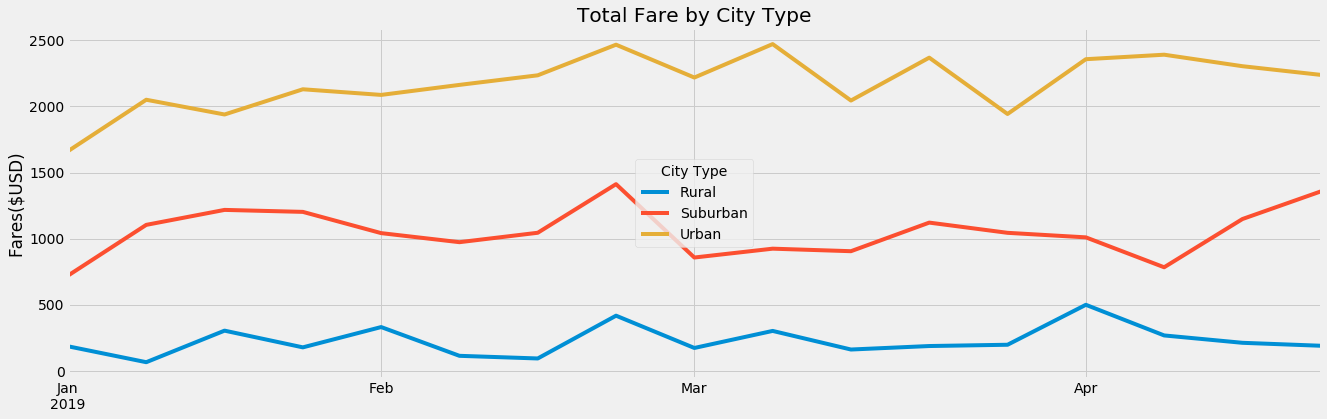

In [54]:
# 9. Plot the line graph using object-oriented interface method

plt.style.use('fivethirtyeight')

fig, challenge = plt.subplots(figsize=(20,6))
challenge.plot(challenge_line_graph_df['Rural'],label='Rural')
challenge.plot(challenge_line_graph_df['Suburban'],label='Suburban')
challenge.plot(challenge_line_graph_df['Urban'],label='Urban')

# Add title and axes labels
challenge.set_title('Total Fare by City Type')
challenge.set_ylabel("Fares($USD)")

print(plt.xticks())

# Relabel x-ticks
plt.xticks([737065.,  737093., 737121., 737156.,
       737180.],["Jan\n2019", "Feb", "Mar", "Apr"])

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
plt.xlim(737065.,737177.)

# Add a legend and grid
challenge.legend(loc="center", title="City Type")

# Save figure
plt.savefig("images/Tech_Analysis_2_Multi-Line_Plot.PNG")

# Show figure
plt.show()